Credit Score Classification (EDA + Classification)

1. Importing the libraries

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict
from imblearn.over_sampling import SMOTE

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Modelling 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

2. Importing the data

In [2]:
dataset = pd.read_csv('CustomerCreditDataSet.csv', encoding = 'utf-8', sep=';')

In [3]:
### Looking at the sample data in the dataset

dataset.head(10)

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Medeni_Durum,Cinsiyet,Egitim_Durumu,Unvani,...,Talebinin_Altında_Teklif_VarMi,Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi,Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Yazilmis_Cek_Kontrolu_UygunMu,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,0.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,1.0,0.0,0.0,0.0,0.0,Evli ...,Kadin ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,1.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,12452.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,10016.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Doktora ...,Üst Düzey Yönetici,...,NaN,NaN,NaN,NaN,Hayir,NaN,NaN,3,Kendine Ait,Çok İyi
5,5300,1.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,Üst Düzey Yönetici,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi
6,10300,2575.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
7,9200,1.0,0.0,0.0,0.0,0.0,Bekar ...,Erkek ...,Yüksek Lisans ...,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi
8,28300,0.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
9,29700,40000.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,14,Kendine Ait,Çok İyi


In [4]:
### Shape of the dataset

dataset.shape

(16151, 25)

3. Exploratory Data Analysis (EDA)

3.1 Datatypes, Missing Data, and Summary Statistics

In [5]:
### Looking at the datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16151 entries, 0 to 16150
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Maas_Belgeli                                                       16151 non-null  int64  
 1   Maas_Belgesiz                                                      16151 non-null  float64
 2   Diger_Belgesiz                                                     16151 non-null  float64
 3   Diger_Belgeli                                                      16151 non-null  float64
 4   Es_Belgeli                                                         16151 non-null  float64
 5   Es_Belgesiz                                                        16151 non-null  float64
 6   Medeni_Durum                                                       16151 non-null  object 
 7   Cinsiyet              

In [6]:
dataset.Medeni_Durum = dataset.Medeni_Durum.astype('category')
dataset.Cinsiyet = dataset.Cinsiyet.astype('category')
dataset.Egitim_Durumu = dataset.Egitim_Durumu.astype('category')
dataset.Unvani = dataset.Unvani.astype('category')
dataset.Meslegi = dataset.Meslegi.astype('category')
dataset.Sektor = dataset.Sektor.astype('category')
dataset.Dogdugu_Ulke = dataset.Dogdugu_Ulke.astype('category')
dataset.Askerlik_Durumu = dataset.Askerlik_Durumu.astype('category')

In [7]:
### Looking at the modified datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16151 entries, 0 to 16150
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   Maas_Belgeli                                                       16151 non-null  int64   
 1   Maas_Belgesiz                                                      16151 non-null  float64 
 2   Diger_Belgesiz                                                     16151 non-null  float64 
 3   Diger_Belgeli                                                      16151 non-null  float64 
 4   Es_Belgeli                                                         16151 non-null  float64 
 5   Es_Belgesiz                                                        16151 non-null  float64 
 6   Medeni_Durum                                                       16151 non-null  category
 7   Cinsiyet     

In [8]:
### Missing data by columns in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Unvani                                                               9938
Sektor                                                                895
Yazilmis_Cek_Kontrolu_UygunMu                                         446
Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi               446
Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi     446
Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi                          446
Talebinin_Altında_Teklif_VarMi                                        446
Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu                   384
Maas_Belgeli                                                            0
Askerlik_Durumu                                                         0
Oturdugu_Ev_Durumu                                                      0
Ikametgah_Yili                                                          0
KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi                              0
Dogdugu_Ulke                          

<Axes: >

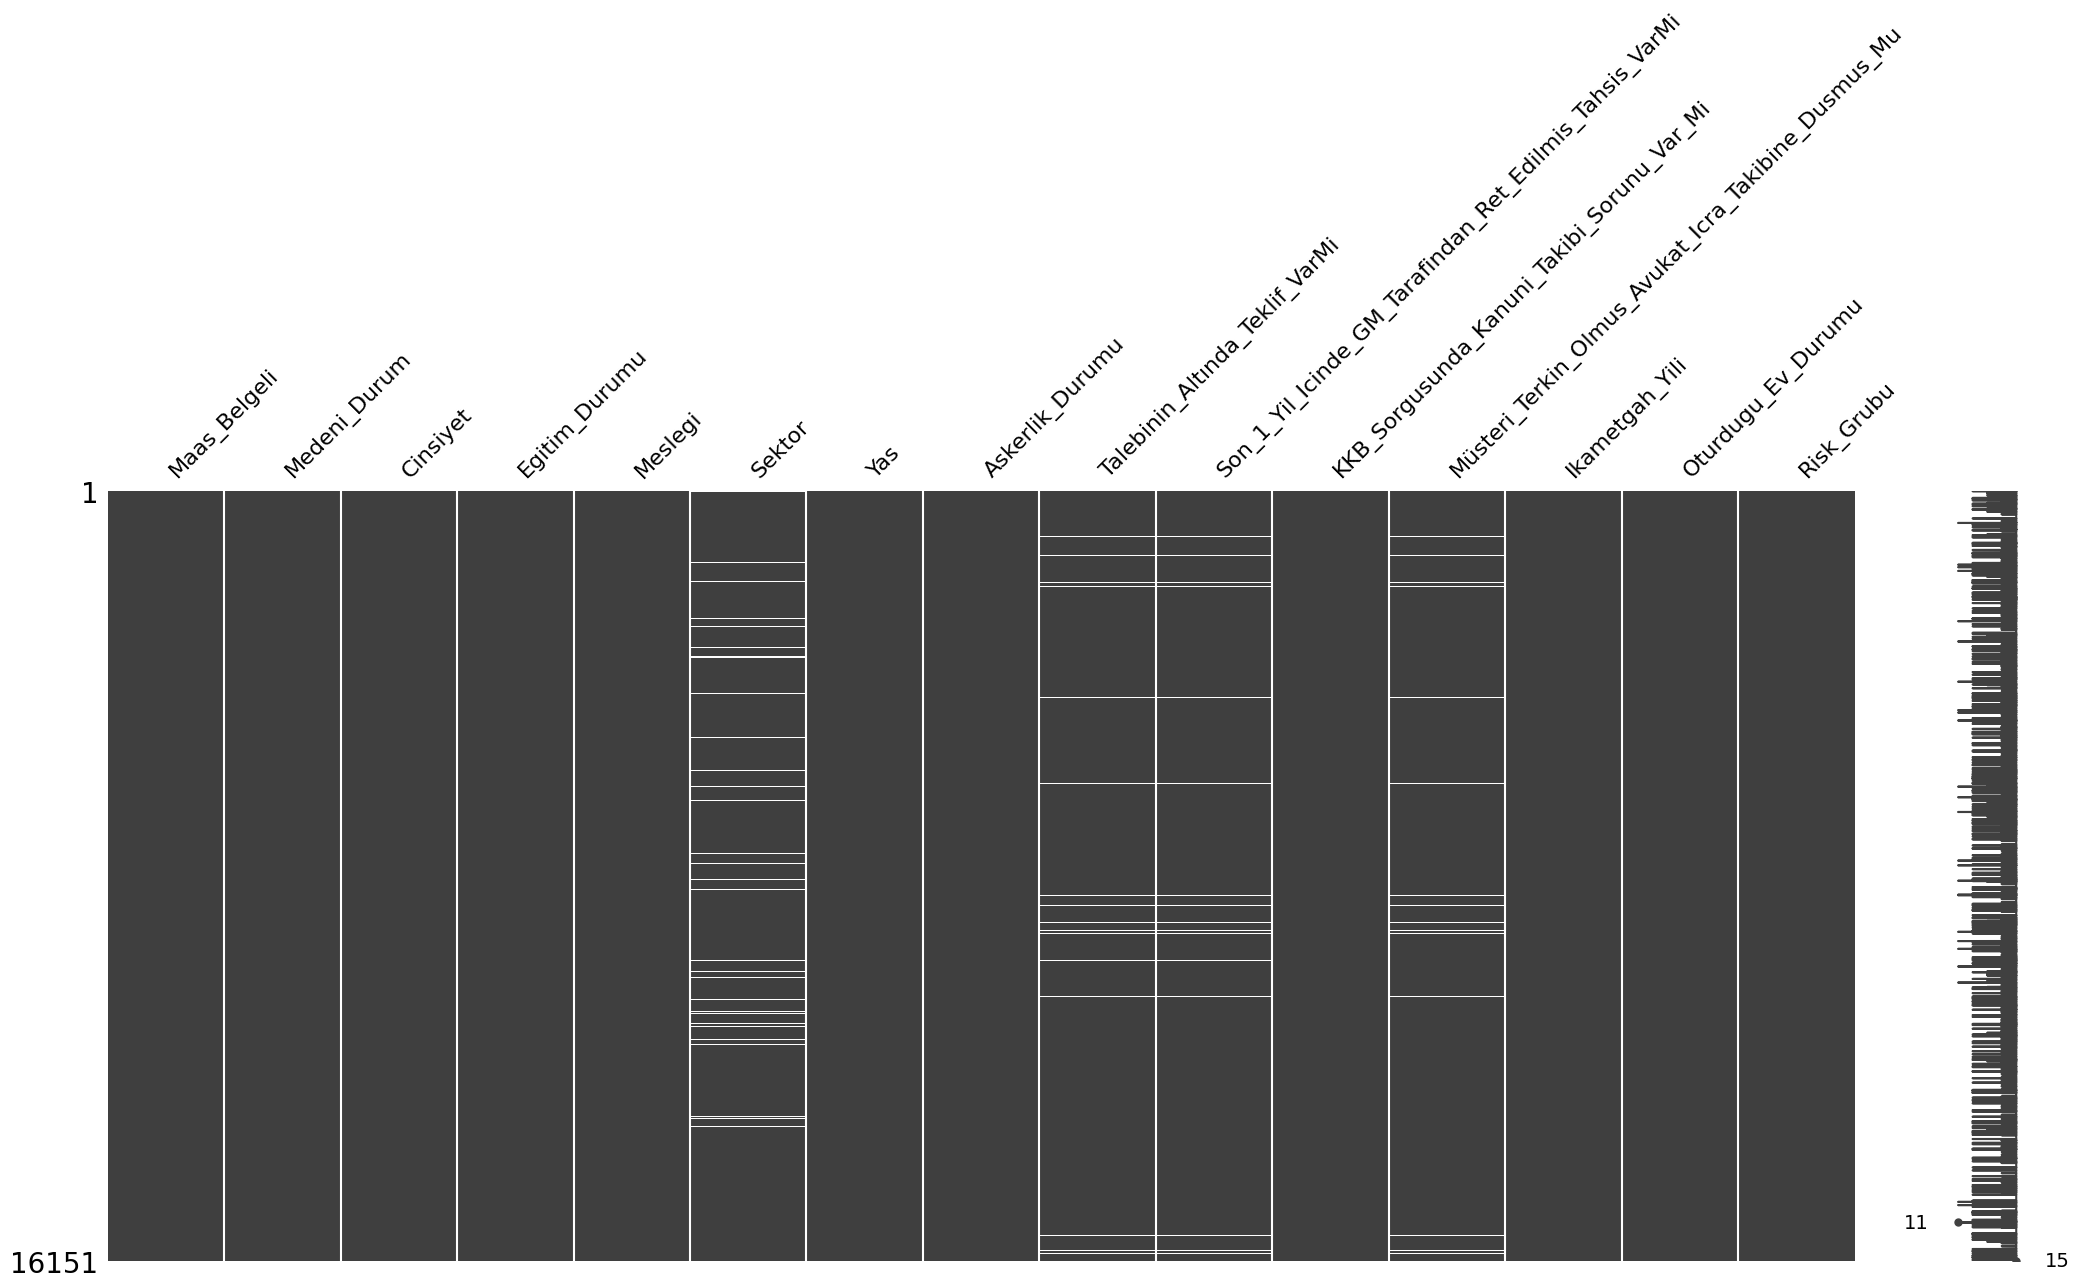

In [9]:
### Visual representation of the missing data in the dataset
dataset.drop(['Maas_Belgesiz','Diger_Belgesiz','Diger_Belgeli', 'Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi', 'Es_Belgeli','Es_Belgesiz','Unvani', 'Dogdugu_Ulke', 'Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi', 'Yazilmis_Cek_Kontrolu_UygunMu'], axis = 1, inplace = True)
missingno.matrix(dataset)

In [10]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Maas_Belgeli,Yas,Ikametgah_Yili
count,16151.000000,16151.000000,16151.000000
mean,7744.517367,42.575135,6.897034
std,7835.848525,9.652079,5.419194
min,0.000000,19.000000,-1.000000
25%,2300.000000,35.000000,4.000000
50%,4600.000000,41.000000,5.000000
75%,9300.000000,48.000000,10.000000
max,32000.000000,89.000000,77.000000


3.2 Feature Analysis

In [11]:
### Value counts of the column - Medeni_Durum

medeni_durum_count = dataset['Medeni_Durum'].value_counts(dropna = False)
medeni_durum_count

Medeni_Durum
Evli                                                                                                   13699
Bekar                                                                                                   1804
Bosanmis                                                                                                 513
Dul                                                                                                      135
Name: count, dtype: int64

Text(0.5, 0, 'Medeni Durum')

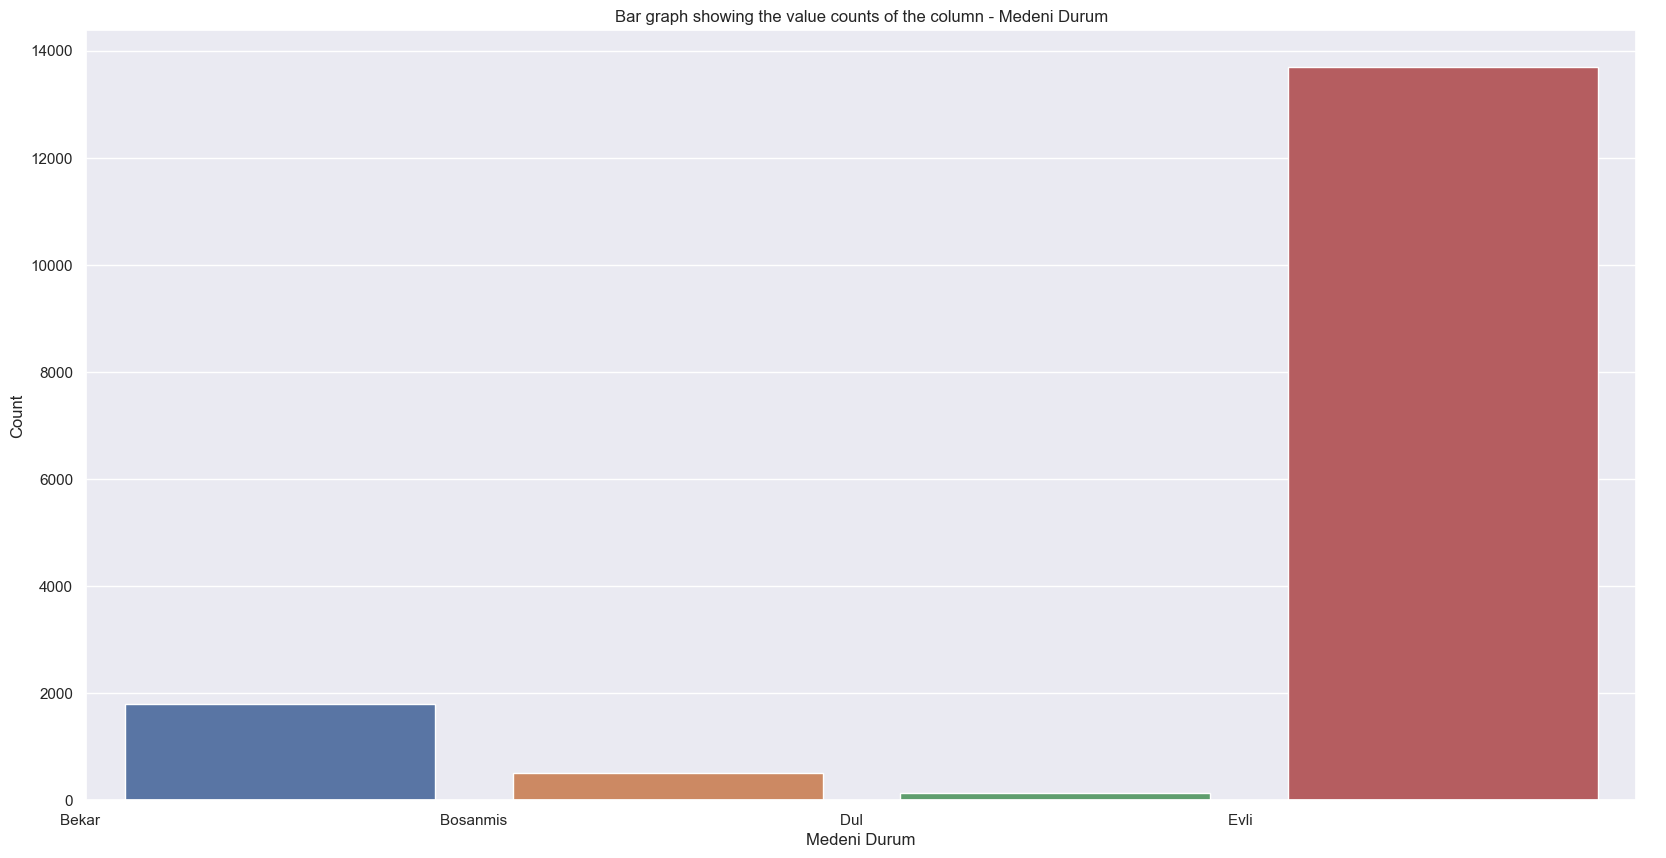

In [12]:
### Bar graph showing the value counts of the column - Medeni Durum

sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(x=medeni_durum_count.index,y= medeni_durum_count.values)
plt.title('Bar graph showing the value counts of the column - Medeni Durum')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Medeni Durum', fontsize = 12)

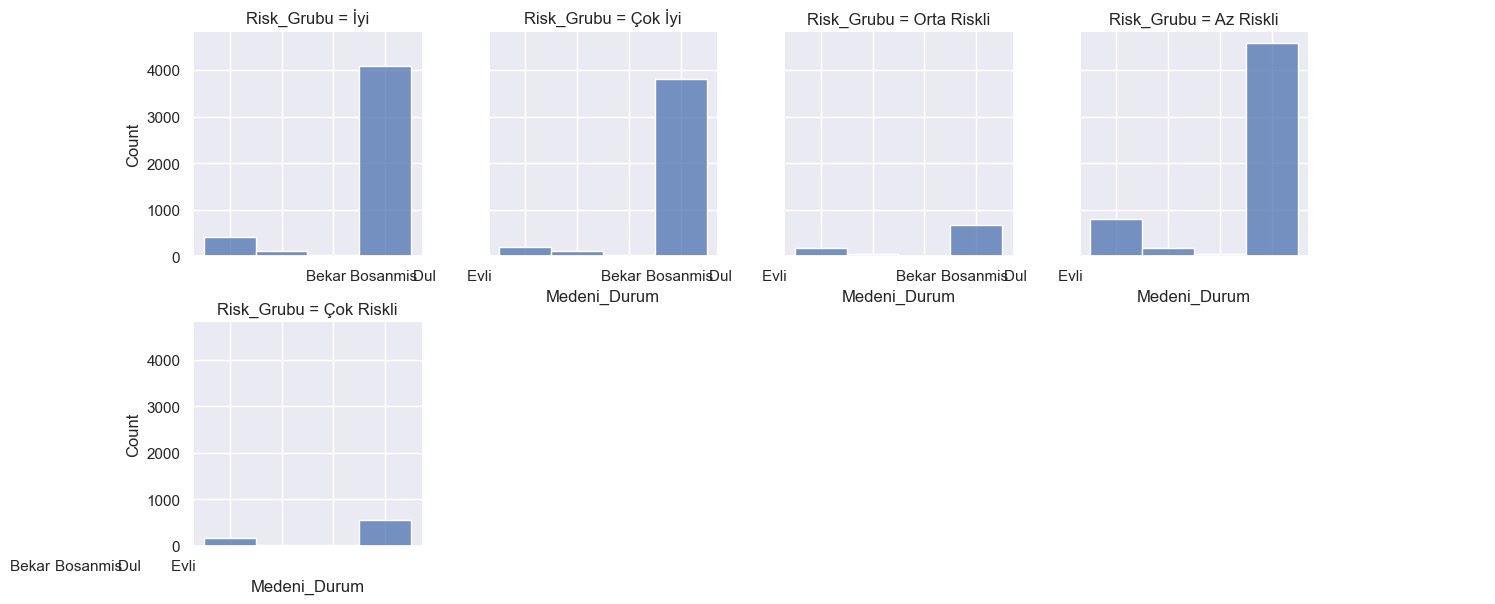

In [13]:
### Distribution of Risk Durumu for each Medeni Durum

g= sns.FacetGrid(col='Risk_Grubu', col_wrap = 4, data = dataset)
g.map(sns.histplot, 'Medeni_Durum')

In [14]:
### Value counts of the column - Risk Grubu

credit_risk_count = dataset['Risk_Grubu'].value_counts(dropna = False)
credit_risk_count

Risk_Grubu
Az Riskli      5619
İyi            4668
Çok İyi        4177
Orta Riskli     921
Çok Riskli      766
Name: count, dtype: int64

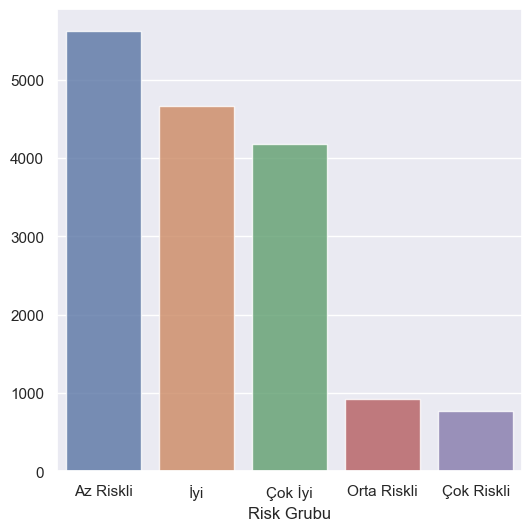

In [15]:
### Bar graph showing the value counts of the column - Risk Grubu

sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x= credit_risk_count.index, y = credit_risk_count.values, alpha = 0.8)
plt.title('')
plt.ylabel('', fontsize = 12)
plt.xlabel('Risk Grubu', fontsize = 12)
plt.show()

In [16]:
### Value counts of the column - Maas_Belgeli

maas_count = dataset['Maas_Belgeli'].value_counts(dropna = False)
maas_count

Maas_Belgeli
2100     388
2200     358
2000     356
1900     353
1800     347
        ... 
18600      8
14000      7
11200      7
10400      6
24900      5
Name: count, Length: 321, dtype: int64

Text(0.5, 1.0, 'Yaş Dağılımı')

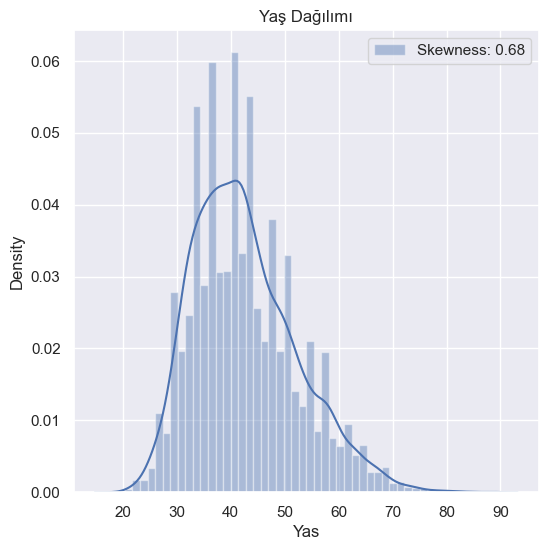

In [17]:
### Understanding the distribution of the column - Yas

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Yaş Dağılımı')

Text(0.5, 1.0, '')

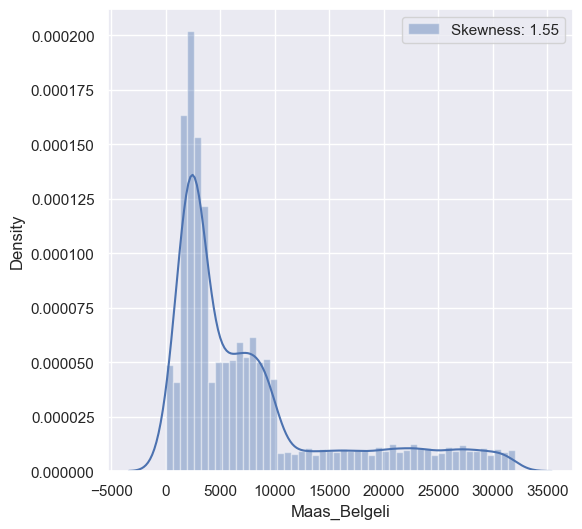

In [18]:
### Understanding the distribution of the column - Maas_Belgeli

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('')

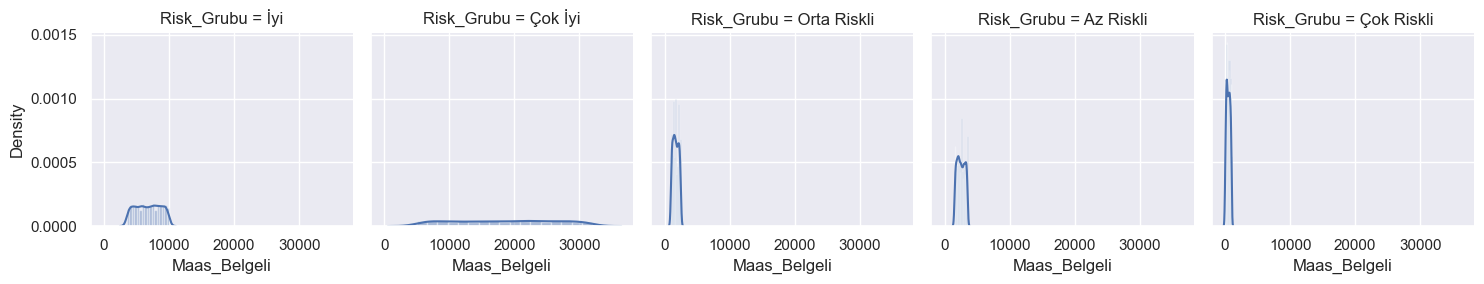

In [19]:
### Monthly Inhand Salary distribution by Risk Grubu

grid = sns.FacetGrid(dataset, col = 'Risk_Grubu')
grid.map(sns.distplot, 'Maas_Belgeli')

Text(0.5, 1.0, '')

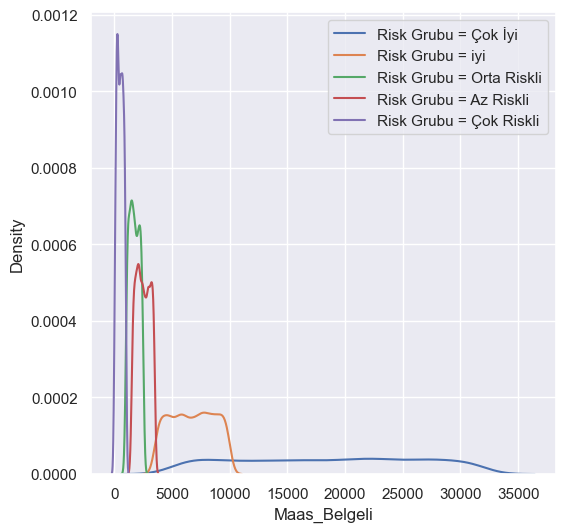

In [20]:
### Merging the above graphs into one

sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Çok İyi'], label = 'Risk Grubu = Çok İyi')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'İyi'], label = 'Risk Grubu = iyi')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Orta Riskli'], label = 'Risk Grubu = Orta Riskli')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Az Riskli'], label = 'Risk Grubu = Az Riskli')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Çok Riskli'], label = 'Risk Grubu = Çok Riskli')
plt.xlabel('Maas_Belgeli')
plt.legend()
plt.title('')

4. Data preprocessing

4.1 Detect and remove outliers in numerical variables

In [21]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(dataset.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(dataset, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Maas_Belgeli', 'Yas', 'Ikametgah_Yili']
We will drop these 8 indices:  [873, 924, 1689, 2621, 3146, 4796, 6336, 7217]


In [22]:
dataset.iloc[outliers_to_drop, :]

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Sektor,Yas,Askerlik_Durumu,Talebinin_Altında_Teklif_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
873,21300,Evli ...,Erkek ...,Fakülte/Lisans,"Esnaf (Bakkal,Market,Berber, Kuaför)",Özel Kurum ...,69,Yapildi,Hayir,Hayir,Hayir,Hayir,34,Kendine Ait,Çok İyi
924,30300,Evli ...,Erkek ...,Fakülte/Lisans,Isçi,Sektör Yok,84,Yapildi,Hayir,Hayir,Hayir,Hayir,20,Kendine Ait,Çok İyi
1689,21000,Evli ...,Erkek ...,Ilkögretim ...,Danisman,Sektör Yok,69,Yapildi,Hayir,Hayir,Hayir,Hayir,23,Kendine Ait,Çok İyi
2621,31500,Evli ...,Erkek ...,Fakülte/Lisans,"Esnaf (Bakkal,Market,Berber, Kuaför)",Özel Kurum ...,68,Yapildi,Hayir,Hayir,Hayir,Hayir,23,Kendine Ait,Çok İyi
3146,22600,Evli ...,Erkek ...,Fakülte/Lisans,"Esnaf (Bakkal,Market,Berber, Kuaför)",Özel Kurum ...,70,Yapildi,Hayir,Hayir,Hayir,Hayir,48,Kendine Ait,Çok İyi
4796,22600,Evli ...,Erkek ...,Ilkögretim ...,"Esnaf (Bakkal,Market,Berber, Kuaför)",Sektör Yok,77,Yapildi,Hayir,Hayir,Hayir,Hayir,30,Kendine Ait,Çok İyi
6336,22500,Evli ...,Erkek ...,Ortaögretim,"Esnaf (Bakkal,Market,Berber, Kuaför)",Sektör Yok,69,Yapildi,Hayir,Hayir,Hayir,Hayir,37,Kendine Ait,Çok İyi
7217,27800,Evli ...,Erkek ...,Fakülte/Lisans,"Esnaf (Bakkal,Market,Berber, Kuaför)",Özel Kurum ...,69,Yapildi,Hayir,Hayir,Hayir,Hayir,40,Kendine Ait,Çok İyi


In [23]:
#  outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 16151 rows
After: 16143 rows


In [24]:

dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Sektor,Yas,Askerlik_Durumu,Talebinin_Altında_Teklif_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,Evli ...,Erkek ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,50,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,Evli ...,Kadin ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,51,Kadin,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,Evli ...,Erkek ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,45,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,Evli ...,Erkek ...,Fakülte/Lisans,Bankaci,Özel Kurum ...,40,Yapildi,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,Evli ...,Erkek ...,Doktora ...,Danisman,Kamu Kurumu ...,53,Yapildi,NaN,NaN,Hayir,NaN,3,Kendine Ait,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,5800,Evli ...,Erkek ...,Fakülte/Lisans,Hakim/Savci,Kamu Kurumu ...,43,Yapildi,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
16139,6100,Evli ...,Erkek ...,Ortaögretim,Isçi,Özel Kurum ...,51,Muaf,Hayir,Hayir,Hayir,Hayir,1,Kendine Ait,İyi
16140,4700,Evli ...,Kadin ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,47,Kadin,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,İyi
16141,4400,Evli ...,Erkek ...,Fakülte/Lisans,Pazarlamaci/Satis Elemani,Özel Kurum ...,32,Yapildi,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi


In [25]:
### Looking at the missing values in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Sektor                                                     895
Talebinin_Altında_Teklif_VarMi                             446
Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi    446
Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu        384
Maas_Belgeli                                                 0
Medeni_Durum                                                 0
Cinsiyet                                                     0
Egitim_Durumu                                                0
Meslegi                                                      0
Yas                                                          0
Askerlik_Durumu                                              0
KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi                   0
Ikametgah_Yili                                               0
Oturdugu_Ev_Durumu                                           0
Risk_Grubu                                                   0
dtype: int64

4.2.1 Handling missing values

In [26]:
dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Sektor,Yas,Askerlik_Durumu,Talebinin_Altında_Teklif_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,Evli ...,Erkek ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,50,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,Evli ...,Kadin ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,51,Kadin,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,Evli ...,Erkek ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,45,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,Evli ...,Erkek ...,Fakülte/Lisans,Bankaci,Özel Kurum ...,40,Yapildi,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,Evli ...,Erkek ...,Doktora ...,Danisman,Kamu Kurumu ...,53,Yapildi,NaN,NaN,Hayir,NaN,3,Kendine Ait,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,5800,Evli ...,Erkek ...,Fakülte/Lisans,Hakim/Savci,Kamu Kurumu ...,43,Yapildi,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
16139,6100,Evli ...,Erkek ...,Ortaögretim,Isçi,Özel Kurum ...,51,Muaf,Hayir,Hayir,Hayir,Hayir,1,Kendine Ait,İyi
16140,4700,Evli ...,Kadin ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,47,Kadin,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,İyi
16141,4400,Evli ...,Erkek ...,Fakülte/Lisans,Pazarlamaci/Satis Elemani,Özel Kurum ...,32,Yapildi,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi


In [27]:
### Finding the median value of the column - Ikametgah Yılı

Ikametgah_Yili_index = list(~dataset['Ikametgah_Yili'].isnull())
median_Ikametgah_Yili= np.median(dataset['Ikametgah_Yili'].loc[Ikametgah_Yili_index])

### Replacing the missing values of the column - Ikametgah Yılı

dataset['Ikametgah_Yili'].fillna(median_Ikametgah_Yili, inplace = True)


In [28]:
index_values = ~dataset['Sektor'].isnull().values
Sektor_data = list(dataset['Sektor'][index_values])

Kamu_Kurumu = [0] * (len(dataset))
Ozel_Kurum = [0] * (len(dataset))

for index in range(len(Sektor_data)):
   
    if 'Kamu Kurumu' in Sektor_data[index]:
        Kamu_Kurumu[index] = 1
    
    if 'Özel Kurum' in Sektor_data[index]:
        Ozel_Kurum[index] = 1


dataset['Kamu_Kurumu'] = Kamu_Kurumu
dataset['Ozel_Kurum'] = Ozel_Kurum


dataset.drop(['Sektor'], axis = 1, inplace = True)

In [29]:
index_values = ~dataset['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'].isnull().values
KanuniTakip_data = list(dataset['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'][index_values])

KanuniTakip_Evet = [0] * (len(dataset))
KanuniTakip_Hayir = [0] * (len(dataset))


for index in range(len(KanuniTakip_data)):
   
    if 'Evet' in KanuniTakip_data[index]:
        KanuniTakip_Evet[index] = 1
    
    if 'Hayir' in KanuniTakip_data[index]:
        KanuniTakip_Hayir[index] = 1


dataset['KanuniTakip_Evet'] = KanuniTakip_Evet
dataset['KanuniTakip_Hayir'] = KanuniTakip_Hayir


dataset.drop(['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'], axis = 1, inplace = True)

In [30]:
index_values = ~dataset['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'].isnull().values
RETEdilmis_data = list(dataset['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'][index_values])

RETEdilmis_Evet = [0] * (len(dataset))
RETEdilmis_Hayir = [0] * (len(dataset))


for index in range(len(RETEdilmis_data)):
   
    if 'Evet' in RETEdilmis_data[index]:
        RETEdilmis_Evet[index] = 1
    
    if 'Hayir' in RETEdilmis_data[index]:
        RETEdilmis_Hayir[index] = 1


dataset['RETEdilmis_Evet'] = RETEdilmis_Evet
dataset['RETEdilmis_Hayir'] = RETEdilmis_Hayir


dataset.drop(['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'], axis = 1, inplace = True)

In [31]:
index_values = ~dataset['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'].isnull().values
Avukat_data = list(dataset['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'][index_values])

Avukat_Evet = [0] * (len(dataset))
Avukat_Hayir = [0] * (len(dataset))


for index in range(len(Avukat_data)):
   
    if 'Evet' in Avukat_data[index]:
        Avukat_Evet[index] = 1
    
    if 'Hayir' in Avukat_data[index]:
        Avukat_Hayir[index] = 1


dataset['Avukat_Evet'] = Avukat_Evet
dataset['Avukat_Hayir'] = Avukat_Hayir


dataset.drop(['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'], axis = 1, inplace = True)

In [32]:
index_values = ~dataset['Talebinin_Altında_Teklif_VarMi'].isnull().values
TalepAltiTeklif_data = list(dataset['Talebinin_Altında_Teklif_VarMi'][index_values])

TalepAltiTeklif_Evet = [0] * (len(dataset))
TalepAltiTeklif_Hayir = [0] * (len(dataset))


for index in range(len(TalepAltiTeklif_data)):
   
    if 'Evet' in TalepAltiTeklif_data[index]:
        TalepAltiTeklif_Evet[index] = 1
    
    if 'Hayir' in TalepAltiTeklif_data[index]:
        TalepAltiTeklif_Hayir[index] = 1


dataset['TalepAltiTeklif_Evet'] = TalepAltiTeklif_Evet
dataset['TalepAltiTeklif_Hayir'] = TalepAltiTeklif_Hayir


dataset.drop(['Talebinin_Altında_Teklif_VarMi'], axis = 1, inplace = True)

Data Transform

Text(0.5, 1.0, 'Maas_Belgeli')

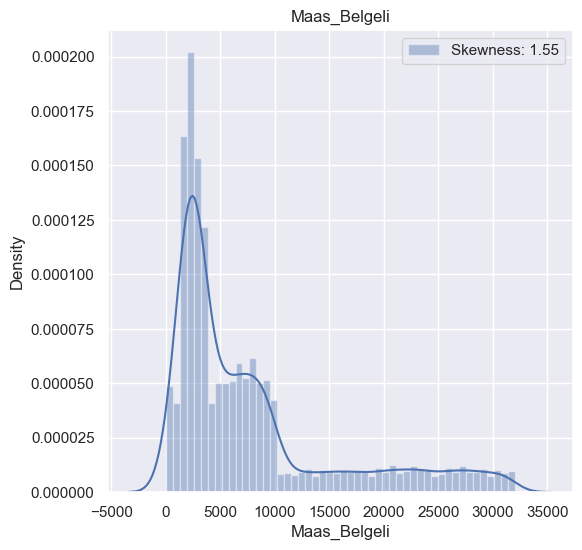

In [33]:
### Understanding the distribution of the column - Maas_Belgeli

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('Maas_Belgeli')

Text(0.5, 1.0, 'Maas_Belgeli')

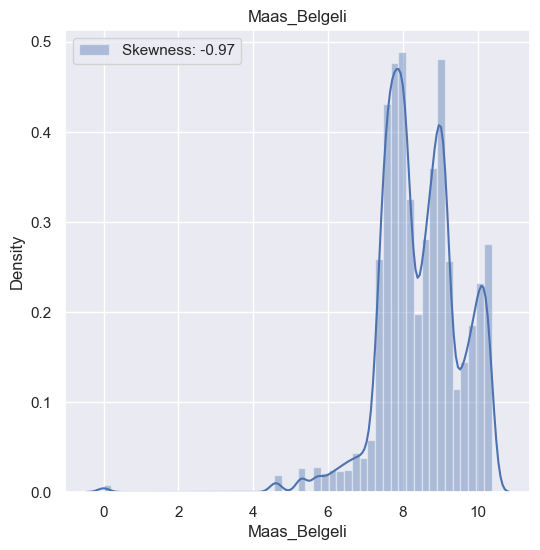

In [34]:
### Understanding the distribution of the data log(Maas_Belgeli)

modified_x = [np.log(x) if x > 0 else 0 for x in dataset['Maas_Belgeli']]
dataset['Maas_Belgeli'] = modified_x

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('Maas_Belgeli')

Text(0.5, 1.0, 'Yas')

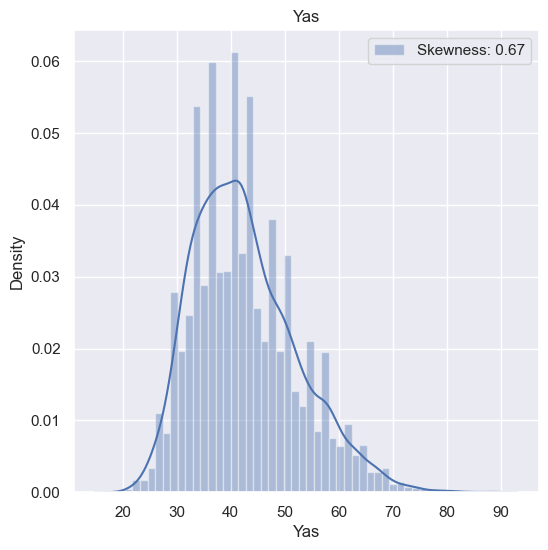

In [35]:
### Understanding the distribution of the column - Yas

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Yas')

Text(0.5, 1.0, 'Yas')

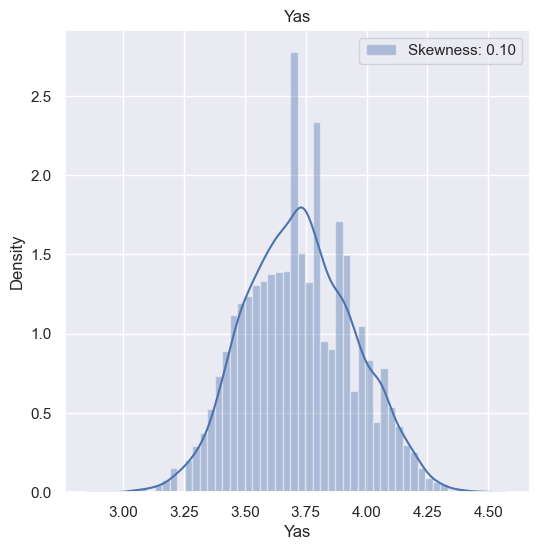

In [36]:
### Understanding the distribution of the data log(Yas)

modified_x = [np.log(x) if x > 0 else 0 for x in dataset['Yas']]
dataset['Yas'] = modified_x

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Yas')

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16143 entries, 0 to 16142
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Maas_Belgeli           16143 non-null  float64 
 1   Medeni_Durum           16143 non-null  category
 2   Cinsiyet               16143 non-null  category
 3   Egitim_Durumu          16143 non-null  category
 4   Meslegi                16143 non-null  category
 5   Yas                    16143 non-null  float64 
 6   Askerlik_Durumu        16143 non-null  category
 7   Ikametgah_Yili         16143 non-null  int64   
 8   Oturdugu_Ev_Durumu     16143 non-null  object  
 9   Risk_Grubu             16143 non-null  object  
 10  Kamu_Kurumu            16143 non-null  int64   
 11  Ozel_Kurum             16143 non-null  int64   
 12  KanuniTakip_Evet       16143 non-null  int64   
 13  KanuniTakip_Hayir      16143 non-null  int64   
 14  RETEdilmis_Evet        16143 non-null 

Feature Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols=["Medeni_Durum", "Cinsiyet", "Egitim_Durumu", "Meslegi", "Askerlik_Durumu", "Oturdugu_Ev_Durumu", "Risk_Grubu" ]
for i in cols:
  dataset[i]=le.fit_transform(dataset[i])

encoded_dataset = dataset


In [39]:
encoded_dataset.isnull().sum()

Maas_Belgeli             0
Medeni_Durum             0
Cinsiyet                 0
Egitim_Durumu            0
Meslegi                  0
Yas                      0
Askerlik_Durumu          0
Ikametgah_Yili           0
Oturdugu_Ev_Durumu       0
Risk_Grubu               0
Kamu_Kurumu              0
Ozel_Kurum               0
KanuniTakip_Evet         0
KanuniTakip_Hayir        0
RETEdilmis_Evet          0
RETEdilmis_Hayir         0
Avukat_Evet              0
Avukat_Hayir             0
TalepAltiTeklif_Evet     0
TalepAltiTeklif_Hayir    0
dtype: int64

Modelling

In [40]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16143 entries, 0 to 16142
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Maas_Belgeli           16143 non-null  float64
 1   Medeni_Durum           16143 non-null  int32  
 2   Cinsiyet               16143 non-null  int32  
 3   Egitim_Durumu          16143 non-null  int32  
 4   Meslegi                16143 non-null  int32  
 5   Yas                    16143 non-null  float64
 6   Askerlik_Durumu        16143 non-null  int32  
 7   Ikametgah_Yili         16143 non-null  int64  
 8   Oturdugu_Ev_Durumu     16143 non-null  int32  
 9   Risk_Grubu             16143 non-null  int32  
 10  Kamu_Kurumu            16143 non-null  int64  
 11  Ozel_Kurum             16143 non-null  int64  
 12  KanuniTakip_Evet       16143 non-null  int64  
 13  KanuniTakip_Hayir      16143 non-null  int64  
 14  RETEdilmis_Evet        16143 non-null  int64  
 15  RE

In [41]:
encoded_dataset['Risk_Grubu'] = encoded_dataset.pop('Risk_Grubu')

In [42]:
encoded_dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Yas,Askerlik_Durumu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Kamu_Kurumu,Ozel_Kurum,KanuniTakip_Evet,KanuniTakip_Hayir,RETEdilmis_Evet,RETEdilmis_Hayir,Avukat_Evet,Avukat_Hayir,TalepAltiTeklif_Evet,TalepAltiTeklif_Hayir,Risk_Grubu
0,8.935904,3,0,1,33,3.912023,3,5,1,1,0,0,1,0,1,0,1,0,1,4
1,8.935904,3,1,5,5,3.931826,0,7,1,1,0,0,1,0,1,0,1,0,1,3
2,9.809177,3,0,5,5,3.806662,3,5,1,1,0,0,1,0,1,0,1,0,1,3
3,8.366370,3,0,1,5,3.688879,3,3,0,0,1,0,1,0,1,0,1,0,1,4
4,10.199882,3,0,0,7,3.970292,3,3,1,1,0,0,1,0,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,8.665613,3,0,1,21,3.761200,3,10,1,0,0,0,1,0,0,0,0,0,0,3
16139,8.716044,3,0,4,26,3.931826,1,1,1,0,0,0,1,0,0,0,0,0,0,4
16140,8.455318,3,1,1,33,3.850148,0,10,1,0,0,0,1,0,0,0,0,0,0,4
16141,8.389360,3,0,1,42,3.465736,3,6,1,0,0,0,1,0,0,0,0,0,0,4


In [43]:
print(encoded_dataset.apply(lambda col: col.unique()))

Maas_Belgeli             [8.935903526274423, 9.809176873064887, 8.36637...
Medeni_Durum                                                  [3, 0, 2, 1]
Cinsiyet                                                            [0, 1]
Egitim_Durumu                                        [1, 5, 0, 4, 2, 6, 3]
Meslegi                  [33, 5, 7, 25, 8, 16, 4, 26, 38, 17, 46, 20, 4...
Yas                      [3.912023005428146, 3.9318256327243257, 3.8066...
Askerlik_Durumu                                               [3, 0, 1, 2]
Ikametgah_Yili           [5, 7, 3, 6, 10, 14, 8, 11, -1, 20, 4, 12, 9, ...
Oturdugu_Ev_Durumu                                         [1, 0, 3, 2, 4]
Kamu_Kurumu                                                         [1, 0]
Ozel_Kurum                                                          [0, 1]
KanuniTakip_Evet                                                    [0, 1]
KanuniTakip_Hayir                                                   [1, 0]
RETEdilmis_Evet          

In [44]:
encoded_dataset.Medeni_Durum = dataset.Medeni_Durum.astype('category')
encoded_dataset.Cinsiyet = dataset.Cinsiyet.astype('category')
encoded_dataset.Egitim_Durumu = dataset.Egitim_Durumu.astype('category')
encoded_dataset.Meslegi = dataset.Meslegi.astype('category')
encoded_dataset.Askerlik_Durumu = dataset.Askerlik_Durumu.astype('category')

In [45]:
encoded_dataset.select_dtypes(include='category').describe()

,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Askerlik_Durumu
count,16143,16143,16143,16143,16143
unique,4,2,7,62,4
top,3,0,1,26,3
freq,13691,12707,8963,3379,12281


In [46]:
X = encoded_dataset.drop('Risk_Grubu', axis=1)
y = encoded_dataset['Risk_Grubu']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)
ctree = DecisionTreeClassifier()
ctree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = ctree.predict(X_test)

In [48]:
### Splitting the data to the matrices X and Y using the training set.

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [49]:
### Dividing the dataset into train and test in the ratio of  : 10

X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

In [50]:
sm = SMOTE(random_state = 42) 
X_train, Y_train = sm.fit_resample(X_train_res, Y_train_res) 
X_test, Y_test = sm.fit_resample(X_test_res, Y_test_res) 

 Fit Model

DecisionTree, Random Forest, CatBoost, XGBC

In [51]:
model_dt  = DecisionTreeClassifier()
model_rf  = RandomForestClassifier()
model_catb  = CatBoostClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

model_rf.fit(X_train, Y_train)
model_dt.fit(X_train, Y_train)
model_catb.fit(X_train, Y_train)
model_xgb.fit(X_train, Y_train)
model_lgbm.fit(X_train, Y_train)

Learning rate set to 0.092731
0:	learn: 1.3461848	total: 161ms	remaining: 2m 40s
1:	learn: 1.1674129	total: 172ms	remaining: 1m 25s
2:	learn: 1.0435744	total: 183ms	remaining: 1m
3:	learn: 0.9444539	total: 196ms	remaining: 48.7s
4:	learn: 0.8586758	total: 207ms	remaining: 41.2s
5:	learn: 0.7866182	total: 219ms	remaining: 36.2s
6:	learn: 0.7295474	total: 232ms	remaining: 32.9s
7:	learn: 0.6776540	total: 246ms	remaining: 30.4s
8:	learn: 0.6328481	total: 257ms	remaining: 28.2s
9:	learn: 0.5930969	total: 268ms	remaining: 26.5s
10:	learn: 0.5595550	total: 280ms	remaining: 25.1s
11:	learn: 0.5302714	total: 290ms	remaining: 23.9s
12:	learn: 0.5031598	total: 301ms	remaining: 22.8s
13:	learn: 0.4777835	total: 312ms	remaining: 22s
14:	learn: 0.4556297	total: 323ms	remaining: 21.2s
15:	learn: 0.4364905	total: 337ms	remaining: 20.7s
16:	learn: 0.4199230	total: 350ms	remaining: 20.2s
17:	learn: 0.4052409	total: 362ms	remaining: 19.7s
18:	learn: 0.3904557	total: 375ms	remaining: 19.3s
19:	learn: 0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
y_pred_dt  = model_dt.predict(X_test)
y_pred_rf  = model_rf.predict(X_test)
y_pred_catb = model_catb.predict(X_test)
y_pred_xgb  = model_xgb.predict(X_test)
y_pred_lgbm = model_lgbm.predict(X_test)

In [53]:
# Random Forest
compare_rf = pd.DataFrame({'Actual':Y_test, 'Prediction':y_pred_rf})
compare_rf = compare_rf.reset_index().drop('index',axis=1)

# Decision Tree
compare_dt = pd.DataFrame({'Actual':Y_test, 'Prediction':y_pred_dt})
compare_dt = compare_dt.reset_index().drop('index',axis=1)

# CatBoost
compare_catb = pd.DataFrame({'Actual':Y_test, 'Prediction':y_pred_catb.T[0]})
compare_catb = compare_catb.reset_index().drop('index',axis=1)

# XGBoost
compare_xgb = pd.DataFrame({'Actual':Y_test, 'Prediction':y_pred_xgb})
compare_xgb = compare_xgb.reset_index().drop('index',axis=1)

# XGBoost
compare_lgbm = pd.DataFrame({'Actual':Y_test, 'Prediction':y_pred_lgbm})
compare_lgbm = compare_lgbm.reset_index().drop('index',axis=1)

In [54]:
# Random Forest
result_rf = []

for i,j in compare_rf.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_rf.append('True Positive')
        else:
            result_rf.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_rf.append('False Positive')
        else:
            result_rf.append('False Negative')

compare_rf['Result'] = result_rf
print('Random Forest')
compare_rf['Result'].value_counts()

Random Forest


Result
True Negative     4250
True Positive      948
False Negative     403
False Positive      54
Name: count, dtype: int64

In [55]:
# Decision Tree
result_dt = []

for i,j in compare_dt.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_dt.append('True Positive')
        else:
            result_dt.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_dt.append('False Positive')
        else:
            result_dt.append('False Negative')

compare_dt['Result'] = result_dt
compare_dt['Result'].value_counts()

Result
True Negative     4080
True Positive     1000
False Negative     475
False Positive     100
Name: count, dtype: int64

In [56]:
# CatBoost
result_catb = []

for i,j in compare_catb.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_catb.append('True Positive')
        else:
            result_catb.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_catb.append('False Positive')
        else:
            result_catb.append('False Negative')

compare_catb['Result'] = result_catb
print('Random Forest')
compare_catb['Result'].value_counts()

Random Forest


Result
True Negative     4289
True Positive     1010
False Negative     335
False Positive      21
Name: count, dtype: int64

In [57]:
# XGBoost Classifier
result_xgb = []

for i,j in compare_xgb.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_xgb.append('True Positive')
        else:
            result_xgb.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_xgb.append('False Positive')
        else:
            result_xgb.append('False Negative')

compare_xgb['Result'] = result_xgb
print('XGBoost Classifier')
compare_xgb['Result'].value_counts()

XGBoost Classifier


Result
True Negative     4267
True Positive     1014
False Negative     344
False Positive      30
Name: count, dtype: int64

In [ ]:
# LightGbm Classifier
result_lgbm = []

for i,j in compare_lgbm.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_lgbm.append('True Positive')
        else:
            result_lgbm.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_lgbm.append('False Positive')
        else:
            result_lgbm.append('False Negative')

compare_lgbm['Result'] = result_lgbm
print('XGBoost Classifier')
compare_lgbm['Result'].value_counts()

In [58]:
accuracy, precision, recall, f1 = [],[],[],[]
predictions = [y_pred_rf, y_pred_dt, y_pred_catb,y_pred_xgb]

for pred in predictions:
    accuracy.append(accuracy_score(Y_test, pred,)*100)
    precision.append(precision_score(Y_test, pred, average='macro')*100)
    recall.append(recall_score(Y_test, pred, average='macro')*100)
    f1.append(f1_score(Y_test, pred, average='macro')*100)

compare = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision,'Recall': recall, 'F1_Score': f1},
                        index=['Random Forest','Decision Tree','CatBoost','XGBoost'])### Classification Report
compare.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1_Score
CatBoost,93.704686,94.131462,93.704686,93.684415
XGBoost,93.386384,93.667695,93.386384,93.373351
Random Forest,91.918656,92.425736,91.918656,91.893328
Decision Tree,89.832007,89.900871,89.832007,89.824917


 Applying Logistic Regression

In [59]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

### Dictionary to store model and its precision

model_precision = OrderedDict()

### Dictionary to store model and its recall

model_recall = OrderedDict()

### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [3 4]]
[[ 505  375   24   22  205]
 [ 414  622   54    0   41]
 [  17   92 1022    0    0]
 [  12    2    0  866  251]
 [ 136   27    0  207  761]]
The accuracy of this model is 66.77 %.
The precision of this model is 66.94 %.
The recall of this model is 66.77 %.


Applying K-Nearest Neighbors (k = 1)

In [60]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['1 - Nearest Neighbors'] = nn1_accuracy

nn1_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['1 - Nearest Neighbors'] = nn1_precision

nn1_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['1 - Nearest Neighbors'] = nn1_recall

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [3 4]]
[[777 150  16  24 164]
 [677 347  59   2  46]
 [184 183 759   0   5]
 [ 42   5   1 802 281]
 [176  19   0 241 695]]
The accuracy of this model is 59.77 %.
The precision of this model is 63.09 %.
The recall of this model is 59.77 %.


Applying K - Nearest Neighbors (k = 3)

In [61]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['3 - Nearest Neighbors'] = nn3_accuracy

nn3_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['3 - Nearest Neighbors'] = nn3_precision

nn3_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['3 - Nearest Neighbors'] = nn3_recall

print('The accuracy of this model is {} %.'.format(nn3_accuracy))
print('The precision of this model is {} %.'.format(nn3_precision))
print('The recall of this model is {} %.'.format(nn3_recall))

[[4 3]
 [4 4]
 [0 0]
 ...
 [3 4]
 [4 4]
 [3 4]]
[[719 227  27  15 143]
 [614 415  61   3  38]
 [150 200 781   0   0]
 [ 46   6   2 803 274]
 [239  37   2 194 659]]
The accuracy of this model is 59.72 %.
The precision of this model is 63.06 %.
The recall of this model is 59.72 %.


Applying K - Nearest Neighbors (k = 5)

In [62]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['5 - Nearest Neighbors'] = nn5_accuracy

nn5_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['5 - Nearest Neighbors'] = nn5_precision

nn5_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['5 - Nearest Neighbors'] = nn5_recall

print('The accuracy of this model is {} %.'.format(nn5_accuracy))
print('The precision of this model is {} %.'.format(nn5_precision))
print('The recall of this model is {} %.'.format(nn5_recall))

[[4 3]
 [3 4]
 [0 0]
 ...
 [3 4]
 [4 4]
 [3 4]]
[[664 285  40  15 127]
 [574 461  71   3  22]
 [135 211 785   0   0]
 [ 37  11   2 814 267]
 [210  57   4 235 625]]
The accuracy of this model is 59.22 %.
The precision of this model is 61.86 %.
The recall of this model is 59.22 %.


Applying K - Nearest Neighbors (k = 7)

In [63]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['7 - Nearest Neighbors'] = nn7_accuracy

nn7_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['7 - Nearest Neighbors'] = nn7_precision

nn7_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['7 - Nearest Neighbors'] = nn7_recall

print('The accuracy of this model is {} %.'.format(nn7_accuracy))
print('The precision of this model is {} %.'.format(nn7_precision))
print('The recall of this model is {} %.'.format(nn7_recall))

[[4 3]
 [3 4]
 [0 0]
 ...
 [3 4]
 [4 4]
 [3 4]]
[[617 315  43  20 136]
 [550 481  76   2  22]
 [137 215 779   0   0]
 [ 20  13   2 817 279]
 [176  75   5 233 642]]
The accuracy of this model is 58.99 %.
The precision of this model is 61.34 %.
The recall of this model is 58.99 %.


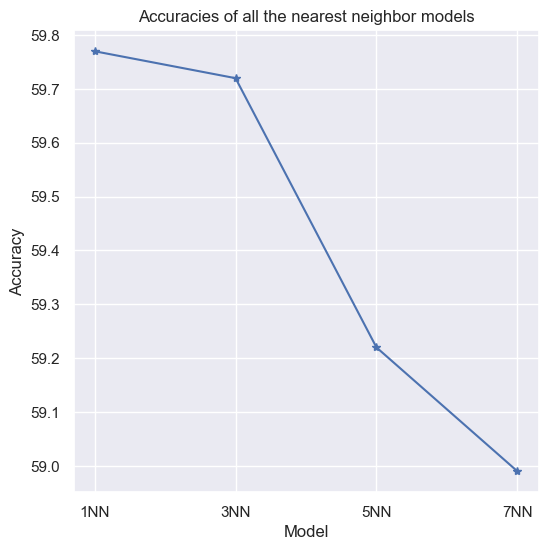

In [64]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

Applying Gaussian Naive Bayes

In [65]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[3 3]
 [3 4]
 [3 0]
 ...
 [3 4]
 [3 4]
 [3 4]]
[[ 148  115   34  833    1]
 [  41  546  145  399    0]
 [   4    1 1101   25    0]
 [   0    0    4 1127    0]
 [   3    0    4 1121    3]]
The accuracy of this model is 51.72 %.
The precision of this model is 70.12 %.
The recall of this model is 51.72 %.


Applying Decision Tree Classification

In [66]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree'] = decision_tree_accuracy

decision_tree_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Decision Tree'] = decision_tree_precision

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Decision Tree'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1030   98    0    0    3]
 [ 113 1017    1    0    0]
 [   0    2 1129    0    0]
 [   0    0    0  984  147]
 [   4    0    0  192  935]]
The accuracy of this model is 90.1 %.
The precision of this model is 90.12 %.
The recall of this model is 90.1 %.


Applying Random Forest Classification (10 trees)

In [67]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (10 trees)'] = random_forest_10_accuracy

random_forest_10_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (10 trees)'] = random_forest_10_precision

random_forest_10_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (10 trees)'] = random_forest_10_recall

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The precision of this model is {} %.'.format(random_forest_10_precision))
print('The recall of this model is {} %.'.format(random_forest_10_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1073   58    0    0    0]
 [ 215  913    3    0    0]
 [   2    2 1127    0    0]
 [   2    0    0  970  159]
 [   5    1    0   80 1045]]
The accuracy of this model is 90.68 %.
The precision of this model is 91.08 %.
The recall of this model is 90.68 %.


Applying Random Forest Classification (25 trees)

In [68]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = random_forest_25_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (25 trees)'] = random_forest_25_accuracy

random_forest_25_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (25 trees)'] = random_forest_25_precision

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The precision of this model is {} %.'.format(random_forest_25_precision))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

[[3 3]
 [3 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1070   61    0    0    0]
 [ 196  933    2    0    0]
 [   1    1 1129    0    0]
 [   0    0    0  956  175]
 [   5    0    0   45 1081]]
The accuracy of this model is 91.41 %.
The precision of this model is 91.86 %.
The recall of this model is 91.41 %.


Applying Random Forest Classification (50 trees)

In [69]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (50 trees)'] = random_forest_50_accuracy

random_forest_50_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (50 trees)'] = random_forest_50_precision

random_forest_50_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (50 trees)'] = random_forest_50_recall

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The precision of this model is {} %.'.format(random_forest_50_precision))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1080   51    0    0    0]
 [ 180  949    2    0    0]
 [   1    1 1129    0    0]
 [   0    0    0  954  177]
 [   4    1    0   39 1087]]
The accuracy of this model is 91.94 %.
The precision of this model is 92.4 %.
The recall of this model is 91.94 %.


Applying Random Forest Classification (100 trees)

In [70]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (100 trees)'] = random_forest_100_accuracy

random_forest_100_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (100 trees)'] = random_forest_100_precision

random_forest_100_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (100 trees)'] = random_forest_100_recall

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The precision of this model is {} %.'.format(random_forest_100_precision))
print('The recall of this model is {} %.'.format(random_forest_100_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1075   56    0    0    0]
 [ 181  948    2    0    0]
 [   1    1 1129    0    0]
 [   2    1    0  950  178]
 [   4    1    0   33 1093]]
The accuracy of this model is 91.87 %.
The precision of this model is 92.34 %.
The recall of this model is 91.87 %.


Applying Stacking Classifier

In [71]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('3nn', classifier_3nn))
base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('random_forest_100', random_forest_100_classifier))

### Define the meta models

meta_model = logistic_classifier

### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

stacking_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Stacking Classification'] = stacking_accuracy

stacking_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Stacking Classification'] = stacking_precision

stacking_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Stacking Classification'] = stacking_recall

print('The accuracy of this model is {} %.'.format(stacking_accuracy))
print('The precision of this model is {} %.'.format(stacking_precision))
print('The recall of this model is {} %.'.format(stacking_recall))

[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1079   51    0    0    1]
 [ 296  834    1    0    0]
 [   1   12 1118    0    0]
 [   0    0    0  967  164]
 [   4    0    0   66 1061]]
The accuracy of this model is 89.46 %.
The precision of this model is 90.25 %.
The recall of this model is 89.46 %.


Applying Soft Voting Classifier

In [72]:
### Preparing the Soft Voting Classifier

### Creating the list of estimators

estimators = list()

estimators.append(('3nn', classifier_3nn))
estimators.append(('decision_tree', decision_tree_classifier))
estimators.append(('random_forest_100', random_forest_100_classifier))

### Applying Soft Voting Classification

soft_voting_classifier = VotingClassifier(estimators = estimators, voting = 'soft')
soft_voting_classifier.fit(X_train, Y_train)

### Predicting the Test set results

Y_pred = soft_voting_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

soft_voting_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Soft Voting'] = soft_voting_accuracy

soft_voting_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Soft Voting'] = soft_voting_precision

soft_voting_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Soft Voting'] = soft_voting_recall

print('The accuracy of this model is {} %.'.format(soft_voting_accuracy))
print('The precision of this model is {} %.'.format(soft_voting_precision))
print('The recall of this model is {} %.'.format(soft_voting_recall))



[[3 3]
 [4 4]
 [0 0]
 ...
 [4 4]
 [4 4]
 [4 4]]
[[1065   66    0    0    0]
 [ 146  984    1    0    0]
 [   1    2 1128    0    0]
 [   0    0    0  972  159]
 [   5    0    0  124 1002]]
The accuracy of this model is 91.09 %.
The precision of this model is 91.19 %.
The recall of this model is 91.09 %.


Model evaluation

In [73]:
### Looking at the model accuracy dictionary

model_accuracy

OrderedDict([('Logistic Regression', 66.77),
             ('1 - Nearest Neighbors', 59.77),
             ('3 - Nearest Neighbors', 59.72),
             ('5 - Nearest Neighbors', 59.22),
             ('7 - Nearest Neighbors', 58.99),
             ('Gaussian Naive Bayes', 51.72),
             ('Decision Tree', 90.1),
             ('Random Forest (10 trees)', 90.68),
             ('Random Forest (25 trees)', 91.41),
             ('Random Forest (50 trees)', 91.94),
             ('Random Forest (100 trees)', 91.87),
             ('Stacking Classification', 89.46),
             ('Soft Voting', 91.09)])

In [74]:
### Looking at the model precision dictionary

model_precision

OrderedDict([('Logistic Regression', 66.94),
             ('1 - Nearest Neighbors', 63.09),
             ('3 - Nearest Neighbors', 63.06),
             ('5 - Nearest Neighbors', 61.86),
             ('7 - Nearest Neighbors', 61.34),
             ('Gaussian Naive Bayes', 70.12),
             ('Decision Tree', 90.12),
             ('Random Forest (10 trees)', 91.08),
             ('Random Forest (25 trees)', 91.86),
             ('Random Forest (50 trees)', 92.4),
             ('Random Forest (100 trees)', 92.34),
             ('Stacking Classification', 90.25),
             ('Soft Voting', 91.19)])

In [75]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 66.77),
             ('1 - Nearest Neighbors', 59.77),
             ('3 - Nearest Neighbors', 59.72),
             ('5 - Nearest Neighbors', 59.22),
             ('7 - Nearest Neighbors', 58.99),
             ('Gaussian Naive Bayes', 51.72),
             ('Decision Tree', 90.1),
             ('Random Forest (10 trees)', 90.68),
             ('Random Forest (25 trees)', 91.41),
             ('Random Forest (50 trees)', 91.94),
             ('Random Forest (100 trees)', 91.87),
             ('Stacking Classification', 89.46),
             ('Soft Voting', 91.09)])

In [76]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │   Model Precision │   Model Recall │
╞═════════╪═══════════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│       1 │ Logistic Regression       │            66.77 │             66.94 │          66.77 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       2 │ 1 - Nearest Neighbors     │            59.77 │             63.09 │          59.77 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       3 │ 3 - Nearest Neighbors     │            59.72 │             63.06 │          59.72 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       4 │ 5 - Nearest Neighbors     │            59.22 │             61.86 │          59.22 │
├─────────┼───────────────────────────┼─